# 使用滤波器过滤回声
- 期望信号：handle.wav
- 远端回音：handle_echo.wav

In [ ]:
%pip install matplotlib numpy scipy

In [1]:
%matplotlib inline

8192

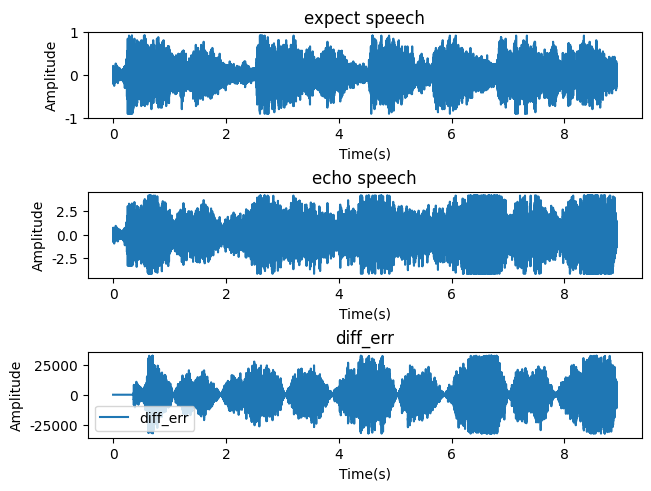

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from IPython.display import display

handle_sample_rate, handle_signal = scipy.io.wavfile.read('handel.wav')
handel_echo_sample_rate, handel_echo_signal = scipy.io.wavfile.read('handel_echo.wav')

handle_n = handle_signal/np.dot(handle_signal, handle_signal)
handle_echo_n = handel_echo_signal/np.dot(handel_echo_signal, handel_echo_signal)
diff_err = handel_echo_signal - handle_signal
x_time = np.linspace(0, len(handle_signal)/handle_sample_rate, len(handle_signal))

plt.rcParams['axes.unicode_minus'] =False
fig, ax = plt.subplots(3,1,layout='constrained')
ax[0].plot(x_time, handle_n, label='handle')
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel('Amplitude')
ax[0].set_title('expect speech')

ax[1].plot(x_time, handle_echo_n, label='handel_echo_signal')
ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel('Amplitude')
ax[1].set_title('echo speech')

ax[2].plot(x_time, diff_err, label='diff_err')
ax[2].set_xlabel("Time(s)")
ax[2].set_ylabel('Amplitude')
ax[2].set_title('diff_err')
plt.legend()

display(handle_sample_rate)

In [23]:
def lms(x, d, N = 8, mu = 0.0001):
  L = min(len(x), len(d)) # x为输入信号
  e = np.zeros(L - N) # 初始误差
  h = np.zeros(N) # 回声路径矩阵
  for n in range(L - N):
    x_n = x[n:n+N][::-1] # 每次取N个值
    d_n = d[n]
    y_n = np.dot(h, x_n.T)
    e_n = d_n - y_n
    h = h + mu * e_n * x_n / (np.dot(x_n, x_n) + 1e-8) # 归一化，并且避免0
    e[n] = e_n
  return e,h # 误差

e,h = lms(handle_signal, handel_echo_signal)
display(h)


array([nan, nan, nan, nan, nan, nan, nan, nan])

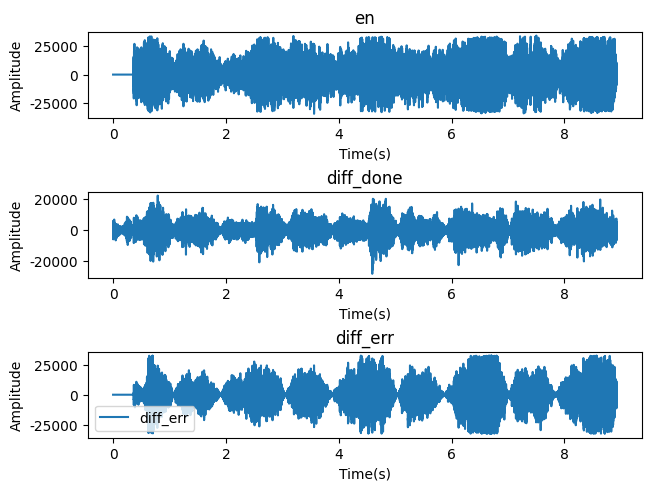

In [27]:
handle_norm = np.dot(handle_signal, handle_signal)
handle_n = handle_signal/handle_norm
handle_echo_n = handel_echo_signal/np.dot(handel_echo_signal, handel_echo_signal)
e,h = lms(handle_n, handle_echo_n, N=3000)


done_rate, done_signal = scipy.io.wavfile.read('done.wav')
diff_done = done_signal - handle_signal

N = len(h)
L = len(handel_echo_signal)
en = np.zeros(L) # 经过回音的计算误差
for i in range(N, L):
  x_n = handle_signal[i-N:i][::-1]
  en[i] = handel_echo_signal[i] - np.dot(h, x_n)

fig, ax = plt.subplots(3,1,layout='constrained')
ax[0].plot(x_time, en, label='handle')
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel('Amplitude')
ax[0].set_title('en')

ax[1].plot(x_time, diff_done, label='diff_done')
ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel('Amplitude')
ax[1].set_title('diff_done')

ax[2].plot(x_time, diff_err, label='diff_err')
ax[2].set_xlabel("Time(s)")
ax[2].set_ylabel('Amplitude')
ax[2].set_title('diff_err')
plt.legend()

In [26]:
for i in range(len(diff_err)):
  if diff_err[i] > 1e-3:
    display(i)
    break

3004